In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the CSV file into a DataFrame
data = pd.read_csv("C:/Users/conma/Downloads/LCE.csv")
data = data.drop('Unnamed: 0', axis = 1)

# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

# Convert 'Male' to 1 and 'Female' to 0
data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female': 0})
print(data.head)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64
<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0         

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[ 0.99070982  0.66780823  0.98215912 ... -1.02088471  0.99733688
  -1.01207287]
 [-1.0093773  -0.01147997  0.98215912 ... -1.02088471 -1.00267023
  -1.01207287]
 [-1.0093773   1.5508829  -1.01816496 ...  0.97954254  0.99733688
   0.98807114]
 ...
 [-1.0093773   0.46402177 -1.01816496 ... -1.02088471 -1.00267023
   0.98807114]
 [ 0.99070982 -1.70970048  0.98215912 ...  0.97954254 -1.00267023
   0.98807114]
 [ 0.99070982 -1.03041227  0.98215912 ...  0.97954254  0.99733688
   0.98807114]]


In [10]:
pca = PCA()

# Fit PCA on the scaled data
pca.fit(data_scaled)

PCA()

In [12]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")



Explained variance ratio: [0.07134222 0.06837914 0.06764796 0.06702019 0.0660091  0.06491488
 0.06384006 0.06302976 0.06241034 0.06092462 0.06064471 0.05881302
 0.05840869 0.05625516 0.05562694 0.0547332 ]


In [16]:
X_pca = pca.transform(data_scaled)

In [18]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(data_scaled)

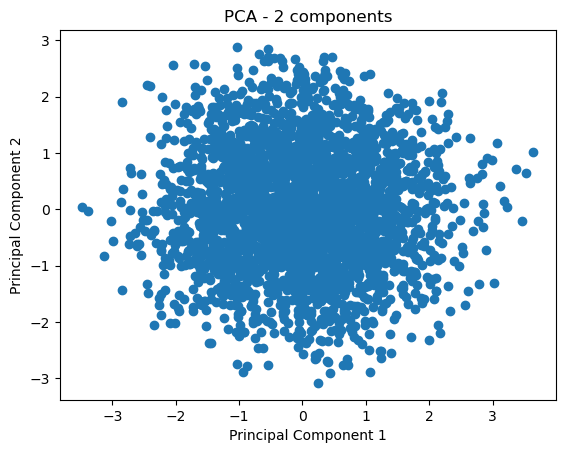

In [20]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 components")
plt.show()

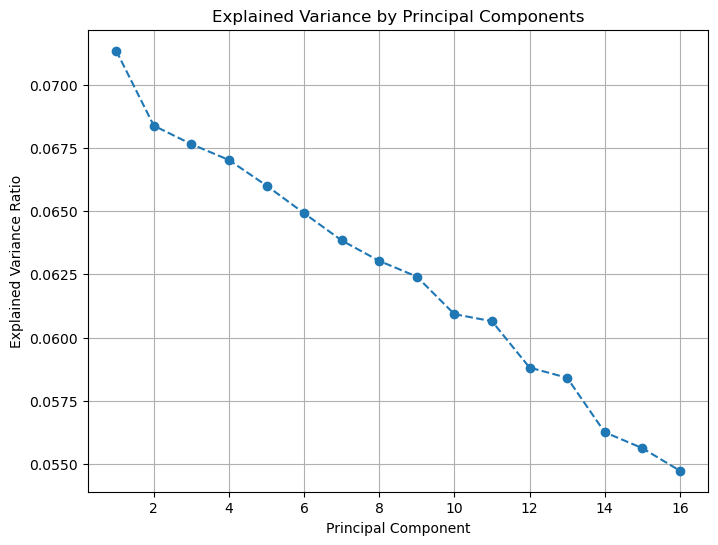

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()